In [1]:
import numpy as np
from scipy.stats import ks_2samp
from scipy import stats
import matplotlib.pyplot as plt
import h5py

import sys
sys.path.append('../../py_files/')
#import weights
import control_sample as control

In [2]:
import os
tex_path = '/apps/texlive/2023/bin/x86_64-linux/'
os.environ['PATH'] += os.pathsep + tex_path

In [3]:
import scienceplots
plt.style.use('science')

In [4]:
pop_file_loc = "/home/pranavsatheesh/host_galaxies/data/population_files/new/"
pop_file = pop_file_loc + "population_sort_gas-100_dm-100_star-100_bh-001_w_rsep_cut_1bh.hdf5"

# pop_file = pop_file_loc + "population_sort_gas-100_dm-100_star-100_bh-001_w_rsep_cut.hdf5"

pop = h5py.File(pop_file, 'r')

In [5]:
pop['merging_population'].keys()

<KeysViewHDF5 ['MBH', 'MBH_1', 'MBH_2', 'MBH_final', 'Mdot', 'Mgas', 'Mstar', 'SFR', 'q_merger', 'rsep', 'snap', 'subhalo_ids', 'z']>

In [33]:
pop['non_merging_population'].keys()

<KeysViewHDF5 ['MBH', 'Mdot', 'Mgas', 'Mstar', 'SFR', 'rsep', 'snap', 'subhalo_ids', 'z']>

In [34]:
len(pop['non_merging_population']['MBH'])

242594

In [6]:
control_file_loc = "/home/pranavsatheesh/host_galaxies/data/control_files/new/"

#control_idx_file = "control_sample_ids.txt"
control_idx_file = "control_sample_ids_w1bh_rsep_and_merger_desc_cut.txt"
controlpop = control.control_samples(pop,control_file_loc,control_idx_file)

The average sSFR for merging galaxies is 1.086e-09
The average sSFR for non-merging galaxies is 6.471e-10
The sSFR enhancement in post mergers is 1.679
The average Mgas for merging galaxies is 1.629e+11
The average Mgas for non-merging galaxies is 1.036e+11
The Mgas enhancement in post mergers is 1.572
The average fgas for merging galaxies is 7.616e-01
The average fgas for non-merging galaxies is 6.449e-01
The fgas enhancement in post mergers is 1.181
The average Mdot for merging galaxies is 6.154e-02
The average Mdot for non-merging galaxies is 3.447e-02
The Mdot enhancement in post mergers is 1.785


In [7]:
Nmergers = np.size(controlpop.MBH_merging_pop[controlpop.valid_post_merger_masks])
print(Nmergers)

398


In [8]:
dex_z = []
dex_z_max = []
dex_Mstar = []
dex_Mstar_max = []

for i in range(Nmergers):
    merging_z = controlpop.pop['merging_population']['z'][i]
    merging_Mstar = controlpop.pop['merging_population']['Mstar'][i]
    control_idx_i = controlpop.control_indices[:,i]

    non_merging_z = controlpop.pop['non_merging_population']['z'][:][control_idx_i]
    non_merging_Mstar = controlpop.pop['non_merging_population']['Mstar'][:][control_idx_i]

    if merging_z<1e-15:
        dex_z_i = 0
    else:
        dex_z_i = (non_merging_z - merging_z)/merging_z * 100
    dex_Mstar_i = np.log10(non_merging_Mstar) - np.log10(merging_Mstar)

    dex_z.append(np.mean(np.abs(dex_z_i)))
    dex_z_max.append(np.max(np.abs(dex_z_i)))

    dex_Mstar.append(np.max(np.abs(dex_Mstar_i)))
    dex_Mstar_max.append(np.max(np.abs(dex_Mstar_i)))

print(np.mean(dex_z),np.mean(dex_Mstar))

0.7545872773315806 0.034308477849673856


In [10]:
print(np.sum(controlpop.MBH_merging_pop==0),"PMs without BHs")
print("sSFR:",controlpop.sSFR_merging_pop[controlpop.MBH_merging_pop==0])
print("Mstar:",controlpop.Mstar_merging_pop[controlpop.MBH_merging_pop==0])
print("SFR:",controlpop.fgas_merging_pop[controlpop.MBH_merging_pop==0])

7 PMs without BHs
sSFR: [0.00000000e+00 1.18052093e-09 1.55772521e-10 6.59408207e-10
 6.64238497e-11 8.42380705e-10 4.72514701e-11]
Mstar: [3.55108266e+08 1.27228772e+10 7.16681110e+10 2.72009941e+09
 2.41327412e+11 2.54364238e+10 1.07958629e+11]
SFR: [5.51013018e-04 8.74108981e-01 6.41952183e-01 9.18842587e-01
 6.05383153e-01 5.37829043e-02 6.60733107e-01]


### Check the control vs mergers match 

Figure saved in ../../figures/new/control-pm-z-Mstar-match.pdf


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: xlabel='z', ylabel='pdf'>,
        <Axes: xlabel='$\\log(M_{\\star}/M_{\\odot})$'>], dtype=object))

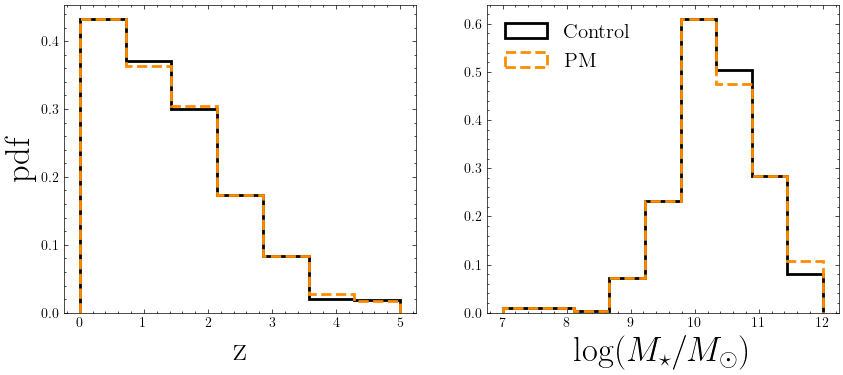

In [13]:
figure_loc = '../../figures/new/'
controlpop.match_z_Mstar_plot(figure_loc)

### Properties of Mergers vs Control

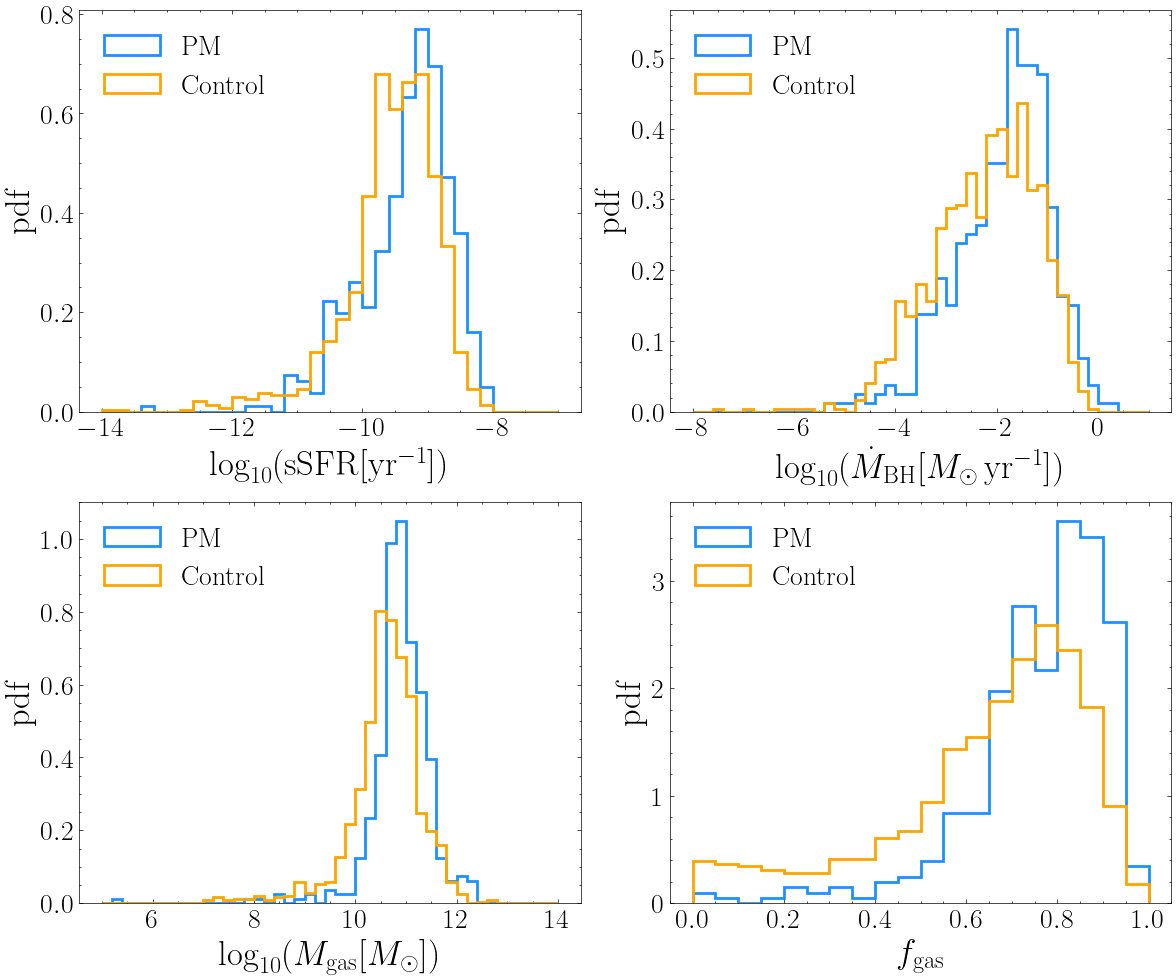

In [14]:
bin_settings = {
            'sSFR': {'binsize': 0.2, 'bin_min': -14, 'bin_max': -7},
            'Mgas': {'binsize': 0.2, 'bin_min': 5, 'bin_max': 14},
            'fgas': {'binsize': 0.05, 'bin_min': 0, 'bin_max': 1},
            'Mdot': {'binsize': 0.2, 'bin_min': -8, 'bin_max': 1},
            }

figure_loc = '../../figures/new/mergers_vs_control_properties_hist.pdf'
axes,fig = controlpop.plot_PM_and_control_histograms(bin_settings)
fig.savefig(figure_loc)

### sSFR vs redshift

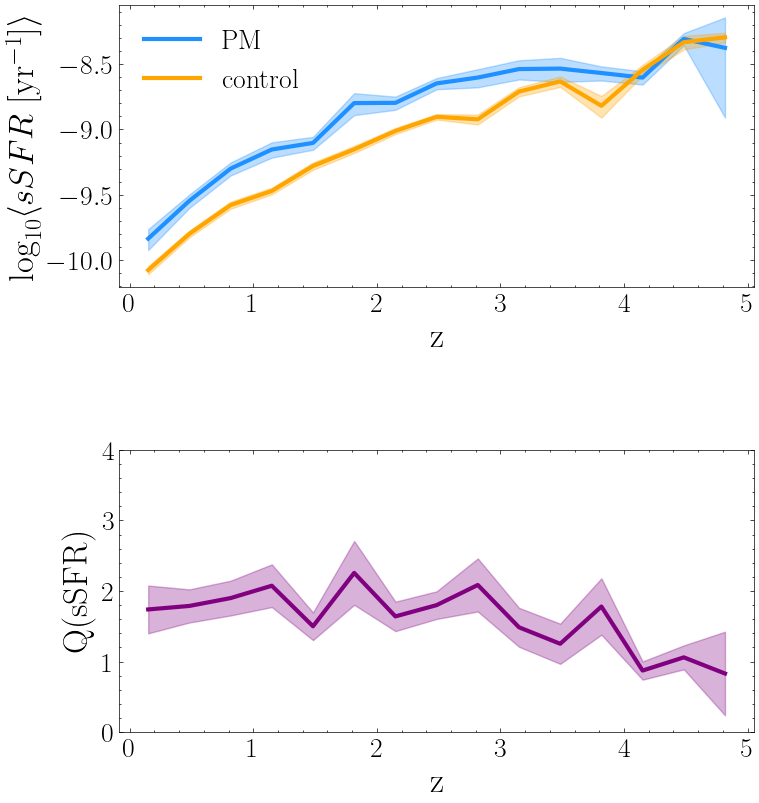

In [15]:
controlpop.set_plot_style(linewidth=3,labelsize=25,ticksize=20,legendsize=20)
fig,axes = controlpop.plot_sSFR_evolution()
fig.set_size_inches(8,9)
figure_loc = '../../figures/new/sSFR_z_evolution_merger_vs_control.pdf'
fig.savefig(figure_loc)

### Mdot vs redshift

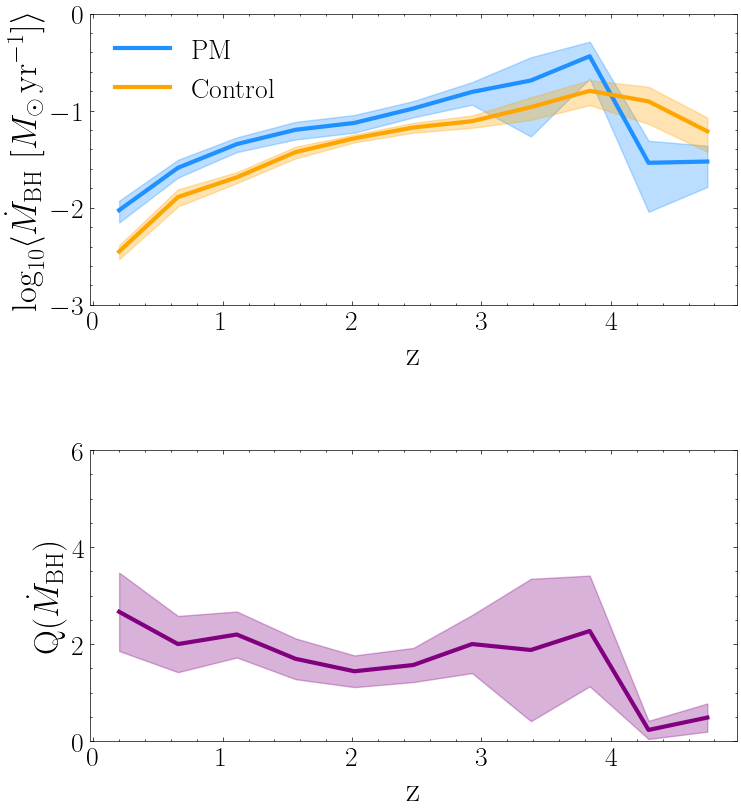

In [16]:
controlpop.set_plot_style(linewidth=3,labelsize=25,ticksize=20,legendsize=20)
fig,axes = controlpop.plot_mdot_evolution(z_min=0, z_max=5, z_binsize=0.4)
fig.set_size_inches(8,9)
axes[0].set_ylim(-3,0)
axes[1].set_ylim(0,6)
axes[0].set_ylabel(r'$\log_{10}\langle \dot{M}_{\mathrm{BH}} \; [M_{\odot} \, \mathrm{yr}^{-1}]\rangle$')
figure_loc = '../../figures/new/mdot_z_evolution_merger_vs_control.pdf'
fig.savefig(figure_loc)

## fgas vs redshift

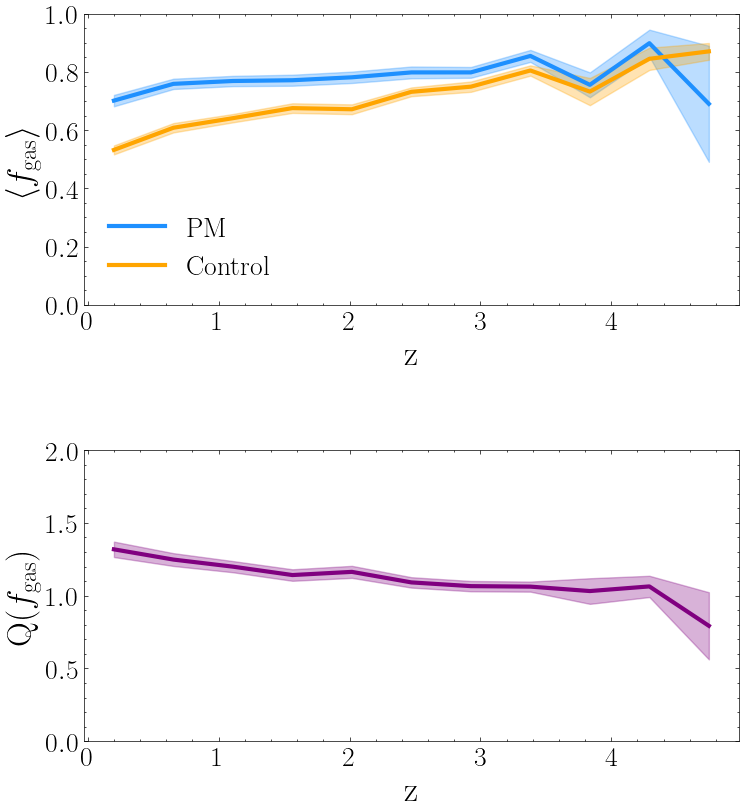

In [17]:
controlpop.set_plot_style(linewidth=3,labelsize=25,ticksize=20,legendsize=20)
fig,axes = controlpop.fgas_evolution(z_min=0, z_max=5, z_binsize=0.4)
fig.set_size_inches(8,9)
axes[0].set_ylim(0,1)
axes[1].set_ylim(0,2)
figure_loc = '../../figures/new/fgas_z_evolution_merger_vs_control.pdf'
fig.savefig(figure_loc)

In [18]:
print("The enhancement in sSFR is %1.3f +/- %1.3f"%(np.mean(controlpop.Q_sSFR),np.mean(controlpop.Q_sSFR_SE)))
print("The enhancement in Mdot is %1.3f +/- %1.3f"%(np.mean(controlpop.Q_Mdot),np.mean(controlpop.Q_Mdot_SE)))
print("The enhancement in fgas is %1.3f +/- %1.3f"%(np.mean(controlpop.Q_fgas),np.mean(controlpop.Q_fgas_SE)))

The enhancement in sSFR is 1.604 +/- 0.293
The enhancement in Mdot is 1.678 +/- 0.604
The enhancement in fgas is 1.107 +/- 0.065


## Calculating dMdot and dSFR


#### $\Delta M_{dot} = \log(M_{dot}(PM)) - median(log(M_{dot} (control))$ 

7
43
50
77
78
105
116
132
138
142
148
191
198
241
246
270
293
314
342
379


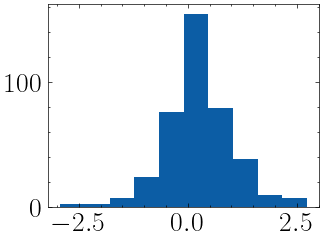

In [19]:
DMgas_dex = []
for i in range(Nmergers):
    Mgas_increment = np.log10(controlpop.pop['merging_population']['Mgas'][controlpop.valid_post_merger_masks][i]) - np.median(np.log10(controlpop.pop['non_merging_population']['Mgas'][:][controlpop.control_indices[:,i]]))
    
    DMgas_dex.append(Mgas_increment)
    if Mgas_increment<-1:
        print(i)
        

plt.hist(DMgas_dex,bins=10)
plt.show()

In [20]:
ii = [64,98,152,417]

for i in ii:

    print("Mgas")
    print(np.log10(controlpop.pop['merging_population']['Mgas'][i]), 
        np.log10(controlpop.pop['non_merging_population']['Mgas'][:][controlpop.control_indices[:,i]]))
    print(np.log10(controlpop.pop['merging_population']['Mgas'][i])-np.median(np.log10(controlpop.pop['non_merging_population']['Mgas'][:][controlpop.control_indices[:,i]])))


    print("Mstar")
    print(np.log10(controlpop.pop['merging_population']['Mstar'][i]),
        np.log10(controlpop.pop['non_merging_population']['Mstar'][:][controlpop.control_indices[:,i]]))
    print(np.log10(controlpop.pop['merging_population']['Mstar'][i])-np.median(np.log10(controlpop.pop['non_merging_population']['Mstar'][:][controlpop.control_indices[:,i]])))

    print("SFR")
    print(np.log10(controlpop.pop['merging_population']['SFR'][i]),
        np.log10(controlpop.pop['non_merging_population']['SFR'][:][controlpop.control_indices[:,i]]))
    print(np.log10(controlpop.pop['merging_population']['SFR'][i])-np.median(np.log10(controlpop.pop['non_merging_population']['SFR'][:][controlpop.control_indices[:,i]])))
    


Mgas
11.116026956059704 [11.05497843 11.20151526 10.93009989]
0.06104852654087978
Mstar
10.563788866132088 [10.55419707 10.58837913 10.53747788]
0.009591792628963702
SFR
1.5855657560162513 [1.661524   1.8538454  1.80559741]
-0.22003165198546948
Mgas
10.919295373743838 [10.80211008 10.89320186 10.67908048]
0.11718529766748986
Mstar
10.18929980052275 [10.18940748 10.18808372 10.19528397]
-0.00010768440311359484
SFR
1.9825516773394203 [1.28152976 1.18867515 0.85676346]
0.793876523029845
Mgas
10.87700518461374 [10.73858384 10.6969956  10.40472432]
0.18000958289231406
Mstar
10.208565817703379 [10.20874748 10.21075666 10.20480128]
-0.00018166152328547014
SFR
0.9648942821082561 [1.12434573 1.10550037 0.60582397]
-0.14060609227648813
Mgas


IndexError: Index (417) out of range for (0-404)

398


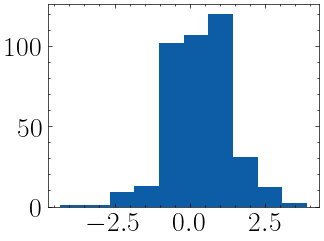

In [21]:
DMdot_dex = []
print(Nmergers)
for i in range(Nmergers):

    PM_mdot = np.log10(controlpop.pop['merging_population']['Mdot'][controlpop.valid_post_merger_masks][i])
    Non_merging_mdot = np.log10(controlpop.pop['non_merging_population']['Mdot'][:][controlpop.control_indices[:,i]])
    
    Mdot_increment = PM_mdot - np.median(Non_merging_mdot)
    DMdot_dex.append(Mdot_increment)

plt.hist(DMdot_dex,bins=10)
plt.show()

In [22]:
Mgas_max = 12.5
Mgas_min = 7.5
Mgas_binsize = 0.7
Nbins_Mgas = int((Mgas_max-Mgas_min)/Mgas_binsize)
Mgas_bins = np.linspace(Mgas_min,Mgas_max,Nbins_Mgas+1)

DMdot_dex_array = np.array(DMdot_dex)
DMdot_dex_median_Mgas = []
DMdot_dex_median_error_Mgas = []

for i in range(len(Mgas_bins)-1):
    merger_bin_mask = (np.log10(controlpop.pop['merging_population']['Mgas'][controlpop.valid_post_merger_masks]) >= Mgas_bins[i]) & (np.log10(controlpop.pop['merging_population']['Mgas'][controlpop.valid_post_merger_masks]) < Mgas_bins[i+1])
    DMdot_dex_median_Mgas.append(np.median(DMdot_dex_array[merger_bin_mask]))
    DMdot_dex_median_error_Mgas.append(np.std(DMdot_dex_array[merger_bin_mask])/np.sqrt(np.sum(merger_bin_mask)))


z_max = 5.0  
z_min = 0.0  
z_binsize = 0.6  
Nbins_z = int((z_max - z_min) / z_binsize)
z_bins = np.linspace(z_min, z_max, Nbins_z + 1)

DMdot_dex_array = np.array(DMdot_dex)
DMdot_dex_median_z = []
DMdot_dex_median_error_z = []

for i in range(len(z_bins) - 1):
    merger_bin_mask = (controlpop.pop['merging_population']['z'][controlpop.valid_post_merger_masks] >= z_bins[i]) & \
                      (controlpop.pop['merging_population']['z'][controlpop.valid_post_merger_masks] < z_bins[i + 1])
    DMdot_dex_median_z.append(np.median(DMdot_dex_array[merger_bin_mask]))
    DMdot_dex_median_error_z.append(np.std(DMdot_dex_array[merger_bin_mask]) / np.sqrt(np.sum(merger_bin_mask)))


Mstar_max = 12.0  # Define the maximum stellar mass
Mstar_min = 7.0   # Define the minimum stellar mass
Mstar_binsize = 1  # Define the bin size for stellar mass
Nbins_Mstar = int((Mstar_max - Mstar_min) / Mstar_binsize)
Mstar_bins = np.linspace(Mstar_min, Mstar_max, Nbins_Mstar + 1)

DMdot_dex_median_Mstar = []
DMdot_dex_median_error_Mstar = []

for i in range(len(Mstar_bins) - 1):
    merger_bin_mask = (np.log10(controlpop.pop['merging_population']['Mstar'][controlpop.valid_post_merger_masks]) >= Mstar_bins[i]) & \
                      (np.log10(controlpop.pop['merging_population']['Mstar'][controlpop.valid_post_merger_masks]) < Mstar_bins[i + 1])
    DMdot_dex_median_Mstar.append(np.median(DMdot_dex_array[merger_bin_mask]))
    DMdot_dex_median_error_Mstar.append(np.std(DMdot_dex_array[merger_bin_mask]) / np.sqrt(np.sum(merger_bin_mask)))


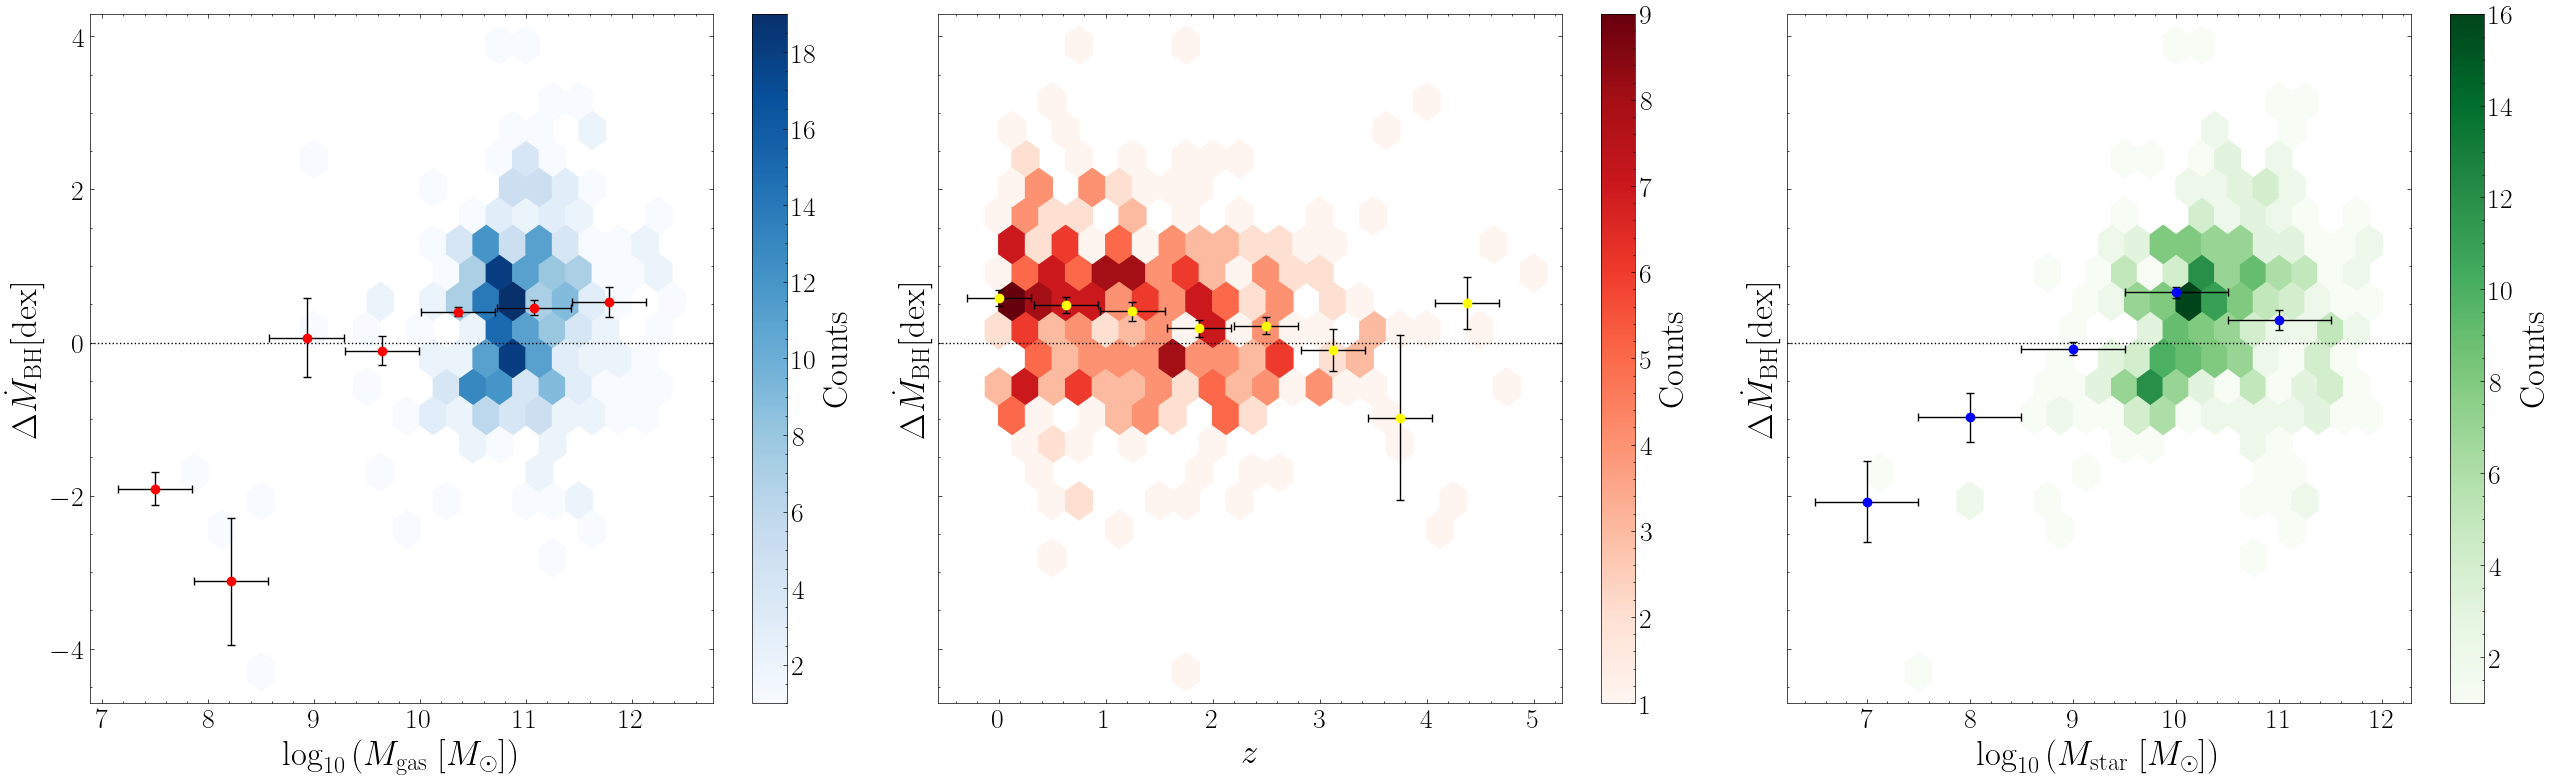

In [23]:
controlpop.set_plot_style(linewidth=3,labelsize=25,ticksize=20,legendsize=20)
fig, axes = plt.subplots(1, 3, figsize=(26, 8), sharey=True)

hex_plot1 = axes[0].hexbin(
    np.log10(controlpop.pop['merging_population']['Mgas'][controlpop.valid_post_merger_masks]),
    DMdot_dex,
    gridsize=20,
    cmap='Blues',
    mincnt=1,
    extent=(Mgas_min, Mgas_max, np.min(DMdot_dex), np.max(DMdot_dex))
)
cbar1 = fig.colorbar(hex_plot1, ax=axes[0])
cbar1.set_label('Counts')
axes[0].errorbar(
    Mgas_bins[:-1],
    DMdot_dex_median_Mgas,
    yerr=DMdot_dex_median_error_Mgas,
    xerr=Mgas_binsize / 2,
    fmt='o',
    color='red',
    ecolor='black',
    elinewidth=1,
    capsize=3
)
axes[0].set_xlabel(r'$\log_{10} \left( M_{\mathrm{gas}} \; [M_{\odot}] \right)$')
axes[0].set_ylabel(r'$\Delta  \dot{M}_{\mathrm{BH}} [\rm dex]$')
axes[0].axhline(0, color='black', linestyle='dotted', linewidth=1)

hex_plot2 = axes[1].hexbin(
    controlpop.pop['merging_population']['z'][controlpop.valid_post_merger_masks],
    DMdot_dex,
    gridsize=20,
    cmap='Reds',
    mincnt=1,
    extent=(z_min, z_max, np.min(DMdot_dex), np.max(DMdot_dex))
)
cbar2 = fig.colorbar(hex_plot2, ax=axes[1])
cbar2.set_label('Counts')
axes[1].errorbar(
    z_bins[:-1],
    DMdot_dex_median_z,
    yerr=DMdot_dex_median_error_z,
    xerr=z_binsize / 2,
    fmt='o',
    color='yellow',
    ecolor='black',
    elinewidth=1,
    capsize=3
)
axes[1].set_xlabel(r'$z$')
axes[1].axhline(0, color='black', linestyle='dotted', linewidth=1)
axes[1].set_ylabel(r'$\Delta  \dot{M}_{\mathrm{BH}} [\rm dex]$')

hex_plot3 = axes[2].hexbin(
    np.log10(controlpop.pop['merging_population']['Mstar'][controlpop.valid_post_merger_masks]),
    DMdot_dex,
    gridsize=20,
    cmap='Greens',
    mincnt=1,
    extent=(Mstar_min, Mstar_max, np.min(DMdot_dex), np.max(DMdot_dex))
)
cbar3 = fig.colorbar(hex_plot3, ax=axes[2])
cbar3.set_label('Counts')
axes[2].errorbar(
    Mstar_bins[:-1],
    DMdot_dex_median_Mstar,
    yerr=DMdot_dex_median_error_Mstar,
    xerr=Mstar_binsize / 2,
    fmt='o',
    color='blue',
    ecolor='black',
    elinewidth=1,
    capsize=3
)
axes[2].set_xlabel(r'$\log_{10} \left( M_{\mathrm{star}} \; [M_{\odot}] \right)$')
axes[2].axhline(0, color='black', linestyle='dotted', linewidth=1)
axes[2].set_ylabel(r'$\Delta  \dot{M}_{\mathrm{BH}} [\rm dex]$')

fig.tight_layout()

/scratch/local/4133548/ipykernel_2953186/2610842556.py:5: RuntimeWarning: divide by zero encountered in log10
  Non_merging_SFR = np.log10(controlpop.pop['non_merging_population']['SFR'][:][controlpop.control_indices[:, i]])


ValueError: supplied range of [-4.111093036122494, inf] is not finite

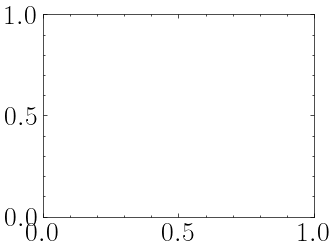

In [24]:
dSFR_dex = []
for i in range(Nmergers):
    
    PM_SFR = np.log10(controlpop.pop['merging_population']['SFR'][controlpop.valid_post_merger_masks][i])
    Non_merging_SFR = np.log10(controlpop.pop['non_merging_population']['SFR'][:][controlpop.control_indices[:, i]])
    Non_merging_SFR[Non_merging_SFR==np.inf] = 0
    
    SFR_increment = PM_SFR - np.median(Non_merging_SFR)
    dSFR_dex.append(SFR_increment)

plt.hist(dSFR_dex, bins=10)
plt.show()

In [25]:
ii = [430]

for i in ii:

    print("Mgas")
    print(np.log10(controlpop.pop['merging_population']['Mgas'][i]), 
        np.log10(controlpop.pop['non_merging_population']['Mgas'][:][controlpop.control_indices[:,i]]))
    print(np.log10(controlpop.pop['merging_population']['Mgas'][i])-np.median(np.log10(controlpop.pop['non_merging_population']['Mgas'][:][controlpop.control_indices[:,i]])))


    print("Mstar")
    print(np.log10(controlpop.pop['merging_population']['Mstar'][i]),
        np.log10(controlpop.pop['non_merging_population']['Mstar'][:][controlpop.control_indices[:,i]]))
    print(np.log10(controlpop.pop['merging_population']['Mstar'][i])-np.median(np.log10(controlpop.pop['non_merging_population']['Mstar'][:][controlpop.control_indices[:,i]])))

    print("SFR")
    print(np.log10(controlpop.pop['merging_population']['SFR'][i]),
        np.log10(controlpop.pop['non_merging_population']['SFR'][:][controlpop.control_indices[:,i]]))
    print(np.log10(controlpop.pop['merging_population']['SFR'][i])-np.median(np.log10(controlpop.pop['non_merging_population']['SFR'][:][controlpop.control_indices[:,i]])))


Mgas


IndexError: Index (430) out of range for (0-404)

In [26]:
Mgas_max = 12.5
Mgas_min = 7.5
Mgas_binsize = 0.7
Nbins_Mgas = int((Mgas_max - Mgas_min) / Mgas_binsize)
Mgas_bins = np.linspace(Mgas_min, Mgas_max, Nbins_Mgas + 1)

dSFR_dex_array = np.array(dSFR_dex)
dSFR_dex_median_Mgas = []
dSFR_dex_median_error_Mgas = []

for i in range(len(Mgas_bins) - 1):
    merger_bin_mask = (np.log10(controlpop.pop['merging_population']['Mgas'][controlpop.valid_post_merger_masks]) >= Mgas_bins[i]) & \
                      (np.log10(controlpop.pop['merging_population']['Mgas'][controlpop.valid_post_merger_masks]) < Mgas_bins[i + 1])
    dSFR_dex_median_Mgas.append(np.median(dSFR_dex_array[merger_bin_mask]))
    dSFR_dex_median_error_Mgas.append(np.std(dSFR_dex_array[merger_bin_mask]) / np.sqrt(np.sum(merger_bin_mask)))


z_max = 5.0  
z_min = 0.0  
z_binsize = 0.6  
Nbins_z = int((z_max - z_min) / z_binsize)
z_bins = np.linspace(z_min, z_max, Nbins_z + 1)

dSFR_dex_median_z = []
dSFR_dex_median_error_z = []

for i in range(len(z_bins) - 1):
    merger_bin_mask = (controlpop.pop['merging_population']['z'][controlpop.valid_post_merger_masks] >= z_bins[i]) & \
                      (controlpop.pop['merging_population']['z'][controlpop.valid_post_merger_masks] < z_bins[i + 1])
    dSFR_dex_median_z.append(np.median(dSFR_dex_array[merger_bin_mask]))
    dSFR_dex_median_error_z.append(np.std(dSFR_dex_array[merger_bin_mask]) / np.sqrt(np.sum(merger_bin_mask)))


Mstar_max = 12.0  
Mstar_min = 7.0   
Mstar_binsize = 1  
Nbins_Mstar = int((Mstar_max - Mstar_min) / Mstar_binsize)
Mstar_bins = np.linspace(Mstar_min, Mstar_max, Nbins_Mstar + 1)



dSFR_dex_median_Mstar = []
dSFR_dex_median_error_Mstar = []

for i in range(len(Mstar_bins) - 1):
    merger_bin_mask = (np.log10(controlpop.pop['merging_population']['Mstar'][controlpop.valid_post_merger_masks]) >= Mstar_bins[i]) & \
                      (np.log10(controlpop.pop['merging_population']['Mstar'][controlpop.valid_post_merger_masks]) < Mstar_bins[i + 1])
    dSFR_dex_median_Mstar.append(np.median(dSFR_dex_array[merger_bin_mask]))
    dSFR_dex_median_error_Mstar.append(np.std(dSFR_dex_array[merger_bin_mask]) / np.sqrt(np.sum(merger_bin_mask)))


/blue/lblecha/pranavsatheesh/.conda/envs/hfrl/lib/python3.10/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


/blue/lblecha/pranavsatheesh/.conda/envs/hfrl/lib/python3.10/site-packages/matplotlib/axes/_axes.py:5185: RuntimeWarning: invalid value encountered in multiply
  offsets[:, 1] *= sy


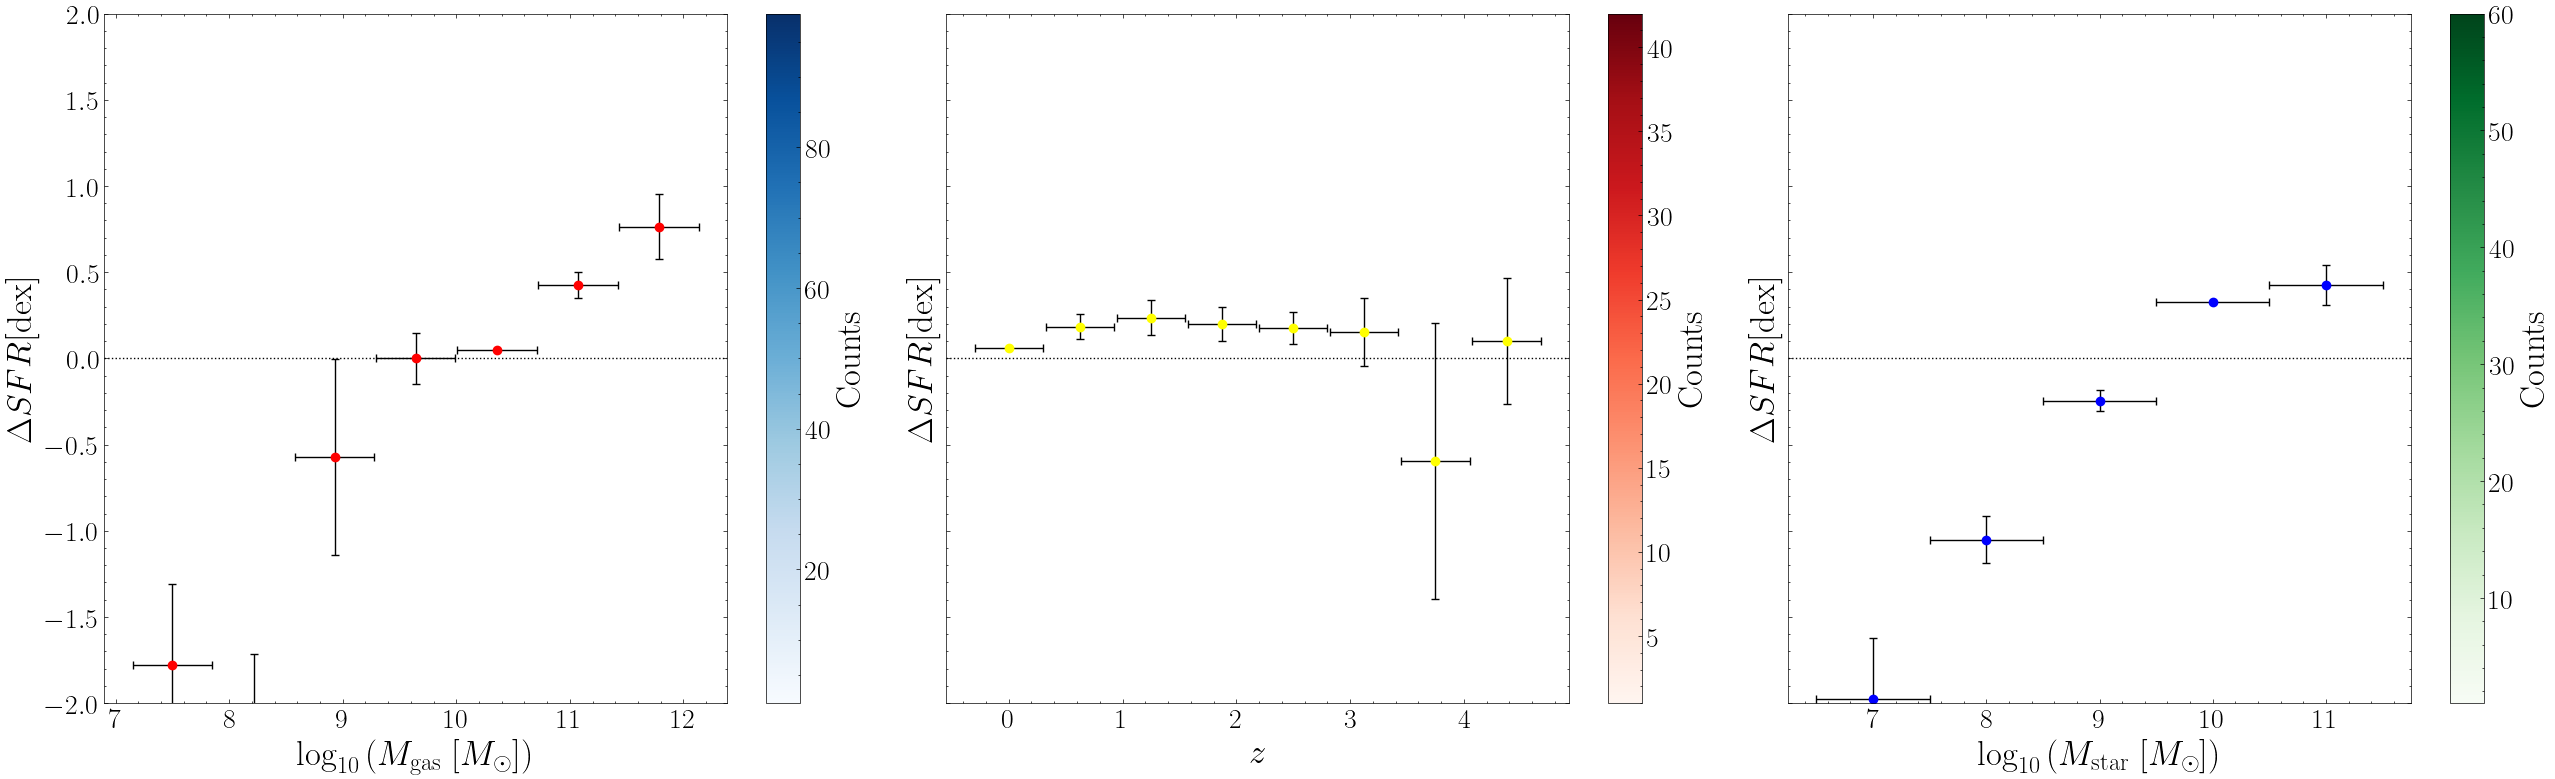

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(26, 8), sharey=True)

hex_plot1 = axes[0].hexbin(
    np.log10(controlpop.pop['merging_population']['Mgas'][controlpop.valid_post_merger_masks]),
    dSFR_dex,
    gridsize=20,
    cmap='Blues',
    mincnt=1,
    extent=(Mgas_min, Mgas_max, np.min(dSFR_dex), np.max(dSFR_dex))
)
cbar1 = fig.colorbar(hex_plot1, ax=axes[0])
cbar1.set_label('Counts')
axes[0].errorbar(
    Mgas_bins[:-1],
    dSFR_dex_median_Mgas,
    yerr=dSFR_dex_median_error_Mgas,
    xerr=Mgas_binsize / 2,
    fmt='o',
    color='red',
    ecolor='black',
    elinewidth=1,
    capsize=3
)
axes[0].set_xlabel(r'$\log_{10} \left( M_{\mathrm{gas}} \; [M_{\odot}] \right)$')
axes[0].set_ylabel(r'$\Delta  SFR [\rm dex]$')
axes[0].set_ylim(-2, 2)
axes[0].axhline(0, color='black', linestyle='dotted', linewidth=1)

hex_plot2 = axes[1].hexbin(
    controlpop.pop['merging_population']['z'][controlpop.valid_post_merger_masks],
    dSFR_dex,
    gridsize=20,
    cmap='Reds',
    mincnt=1,
    extent=(z_min, z_max, np.min(dSFR_dex), np.max(dSFR_dex))
)
cbar2 = fig.colorbar(hex_plot2, ax=axes[1])
cbar2.set_label('Counts')
axes[1].errorbar(
    z_bins[:-1],
    dSFR_dex_median_z,
    yerr=dSFR_dex_median_error_z,
    xerr=z_binsize / 2,
    fmt='o',
    color='yellow',
    ecolor='black',
    elinewidth=1,
    capsize=3
)
axes[1].set_xlabel(r'$z$')
axes[1].set_ylim(-2, 2)
axes[1].axhline(0, color='black', linestyle='dotted', linewidth=1)
axes[1].set_ylabel(r'$\Delta  SFR [\rm dex]$')
hex_plot3 = axes[2].hexbin(
    np.log10(controlpop.pop['merging_population']['Mstar'][controlpop.valid_post_merger_masks]),
    dSFR_dex,
    gridsize=20,
    cmap='Greens',
    mincnt=1,
    extent=(Mstar_min, Mstar_max, np.min(dSFR_dex), np.max(dSFR_dex))
)
cbar3 = fig.colorbar(hex_plot3, ax=axes[2])
cbar3.set_label('Counts')
axes[2].errorbar(
    Mstar_bins[:-1],
    dSFR_dex_median_Mstar,
    yerr=dSFR_dex_median_error_Mstar,
    xerr=Mstar_binsize / 2,
    fmt='o',
    color='blue',
    ecolor='black',
    elinewidth=1,
    capsize=3
)
axes[2].set_xlabel(r'$\log_{10} \left( M_{\mathrm{star}} \; [M_{\odot}] \right)$')
axes[2].set_ylim(-2, 2)
axes[2].axhline(0, color='black', linestyle='dotted', linewidth=1)
axes[2].set_ylabel(r'$\Delta  SFR [\rm dex]$')
fig.tight_layout()


In [82]:
len(dSFR_dex)

437

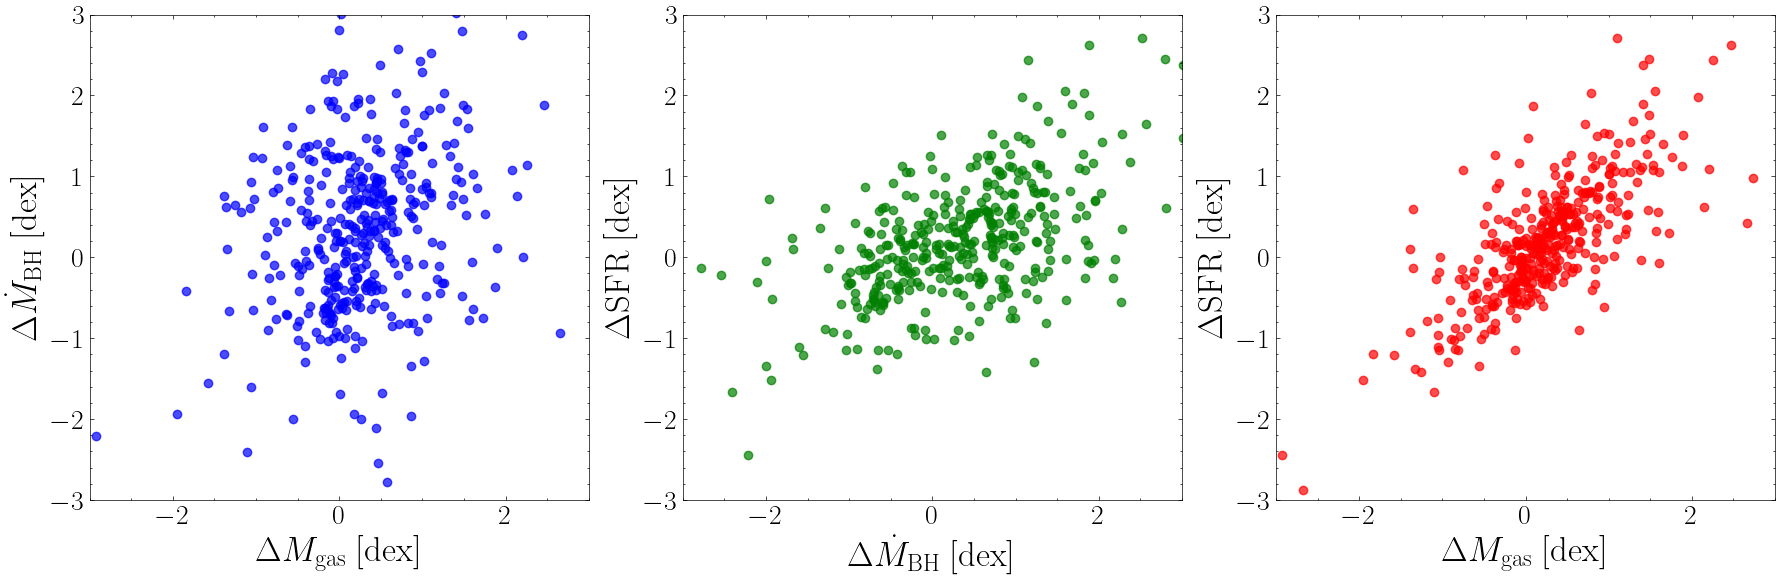

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot: DMdot_dex vs dMgas_dex
axes[0].scatter(DMgas_dex,DMdot_dex, alpha=0.7, color='blue')
axes[0].set_ylabel(r'$\Delta \dot{M}_{\mathrm{BH}} \; [\mathrm{dex}]$')
axes[0].set_xlabel(r'$\Delta M_{\mathrm{gas}} \; [\mathrm{dex}]$')
axes[0].set_xlim(-3, 3)
axes[0].set_ylim(-3, 3)

# Scatter plot: DMdot_dex vs dSFR_dex
axes[1].scatter(DMdot_dex, dSFR_dex, alpha=0.7, color='green')
axes[1].set_xlabel(r'$\Delta \dot{M}_{\mathrm{BH}} \; [\mathrm{dex}]$')
axes[1].set_ylabel(r'$\Delta \mathrm{SFR} \; [\mathrm{dex}]$')
axes[1].set_xlim(-3, 3)
axes[1].set_ylim(-3, 3)


# Scatter plot: dMgas_dex vs dSFR_dex
axes[2].scatter(DMgas_dex, dSFR_dex, alpha=0.7, color='red')
axes[2].set_xlabel(r'$\Delta M_{\mathrm{gas}} \; [\mathrm{dex}]$')
axes[2].set_ylabel(r'$\Delta \mathrm{SFR} \; [\mathrm{dex}]$')
axes[2].set_xlim(-3, 3)
axes[2].set_ylim(-3, 3)

# Adjust layout
plt.tight_layout()
plt.show()